# Data Analysis for Real-World Supply Chain Data

This notebook analyzes the raw data files to understand:
- Distribution of fixed and variable costs
- Distribution of SKU weights and unit costs
- SKUs per supplier
- Orders per day
- SKUs per order
- Relationship between available timesteps and n_skus
- Geographic visualization of warehouses, regions, and suppliers

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Path to raw data
RAW_DATA_PATH = Path("../../data_files/raw")

print("Loading data files...")


Loading data files...


In [2]:
# Load all data files
warehouses_df = pd.read_csv(RAW_DATA_PATH / "01_warehouses.csv")
regions_df = pd.read_csv(RAW_DATA_PATH / "02_regions.csv")
warehouse_to_region_df = pd.read_csv(RAW_DATA_PATH / "03_warehouse_to_region.csv")
suppliers_df = pd.read_csv(RAW_DATA_PATH / "04_suppliers.csv")
supplier_to_warehouse_df = pd.read_csv(RAW_DATA_PATH / "05_supplier_to_warehouse.csv")
skus_df = pd.read_csv(RAW_DATA_PATH / "06_skus.csv")
skus_per_supplier_df = pd.read_csv(RAW_DATA_PATH / "07_skus_per_supplier.csv")
orders_df = pd.read_csv(RAW_DATA_PATH / "08_orders.csv")
order_sku_demand_df = pd.read_csv(RAW_DATA_PATH / "09_order_sku_demand.csv")

print("Data loaded successfully!")
print(f"Warehouses: {len(warehouses_df)}")
print(f"Regions: {len(regions_df)}")
print(f"Suppliers: {len(suppliers_df)}")
print(f"SKUs: {len(skus_df)}")
print(f"Orders: {len(orders_df)}")
print(f"Order-SKU pairs: {len(order_sku_demand_df)}")


Data loaded successfully!
Warehouses: 24
Regions: 57
Suppliers: 572
SKUs: 10578
Orders: 35562
Order-SKU pairs: 258212


## 1. Distribution of Fixed and Variable Costs

### 1.1 Warehouse to Region Costs


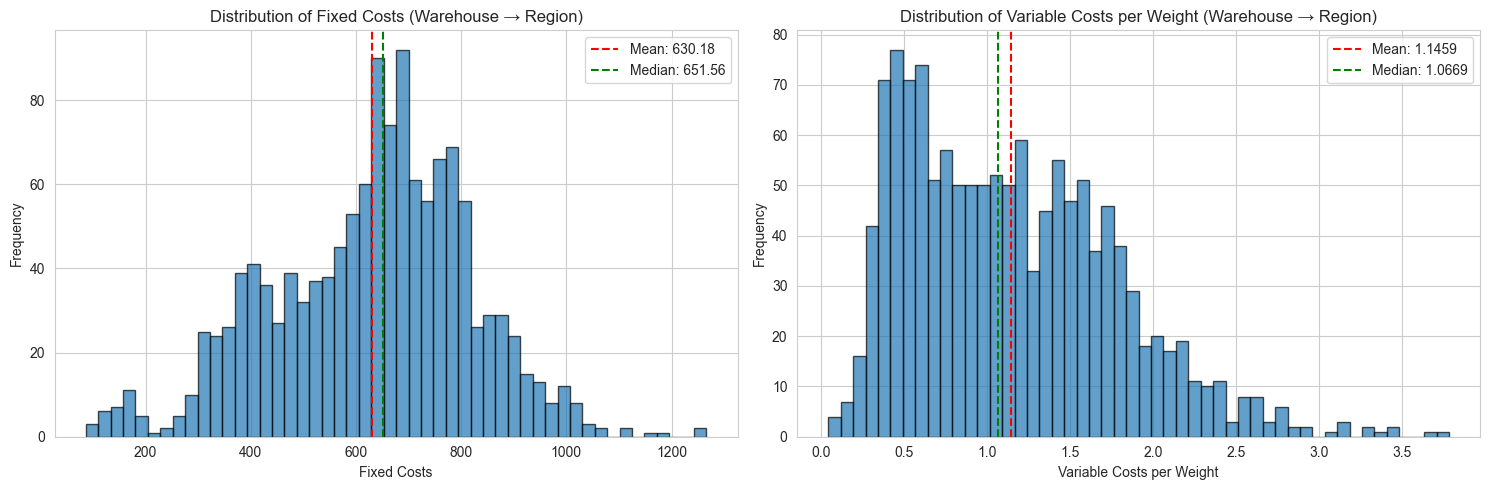

Warehouse → Region Cost Statistics:
Fixed Costs - Mean: 630.18, Std: 187.93
Fixed Costs - Min: 86.27, Max: 1266.45
Variable Costs - Mean: 1.1459, Std: 0.6314
Variable Costs - Min: 0.0457, Max: 3.7796


In [3]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Fixed costs distribution
axes[0].hist(warehouse_to_region_df['fixed_costs'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Fixed Costs')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fixed Costs (Warehouse → Region)')
axes[0].axvline(warehouse_to_region_df['fixed_costs'].mean(), color='r', linestyle='--', label=f'Mean: {warehouse_to_region_df["fixed_costs"].mean():.2f}')
axes[0].axvline(warehouse_to_region_df['fixed_costs'].median(), color='g', linestyle='--', label=f'Median: {warehouse_to_region_df["fixed_costs"].median():.2f}')
axes[0].legend()

# Variable costs distribution
axes[1].hist(warehouse_to_region_df['variable_costs_per_weight'], bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Variable Costs per Weight')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Variable Costs per Weight (Warehouse → Region)')
axes[1].axvline(warehouse_to_region_df['variable_costs_per_weight'].mean(), color='r', linestyle='--', label=f'Mean: {warehouse_to_region_df["variable_costs_per_weight"].mean():.4f}')
axes[1].axvline(warehouse_to_region_df['variable_costs_per_weight'].median(), color='g', linestyle='--', label=f'Median: {warehouse_to_region_df["variable_costs_per_weight"].median():.4f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print statistics
print("Warehouse → Region Cost Statistics:")
print(f"Fixed Costs - Mean: {warehouse_to_region_df['fixed_costs'].mean():.2f}, Std: {warehouse_to_region_df['fixed_costs'].std():.2f}")
print(f"Fixed Costs - Min: {warehouse_to_region_df['fixed_costs'].min():.2f}, Max: {warehouse_to_region_df['fixed_costs'].max():.2f}")
print(f"Variable Costs - Mean: {warehouse_to_region_df['variable_costs_per_weight'].mean():.4f}, Std: {warehouse_to_region_df['variable_costs_per_weight'].std():.4f}")
print(f"Variable Costs - Min: {warehouse_to_region_df['variable_costs_per_weight'].min():.4f}, Max: {warehouse_to_region_df['variable_costs_per_weight'].max():.4f}")


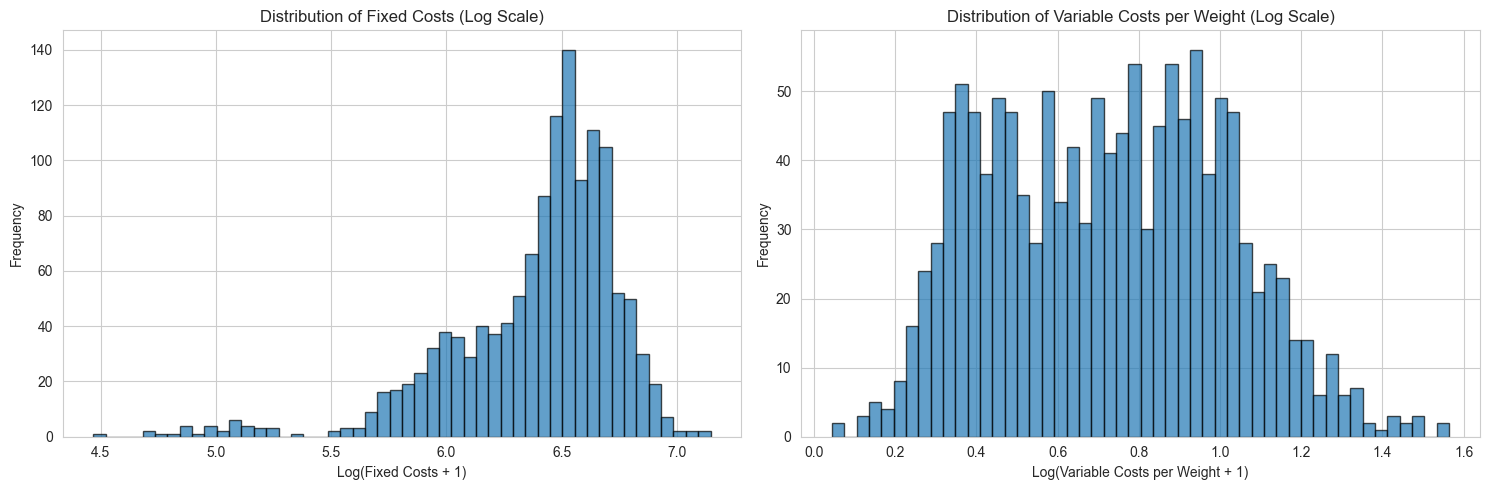

In [4]:
# Log scale for better visualization if needed
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(np.log1p(warehouse_to_region_df['fixed_costs']), bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Log(Fixed Costs + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fixed Costs (Log Scale)')

axes[1].hist(np.log1p(warehouse_to_region_df['variable_costs_per_weight']), bins=50, edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Log(Variable Costs per Weight + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Variable Costs per Weight (Log Scale)')

plt.tight_layout()
plt.show()


### 1.2 Supplier to Warehouse Costs


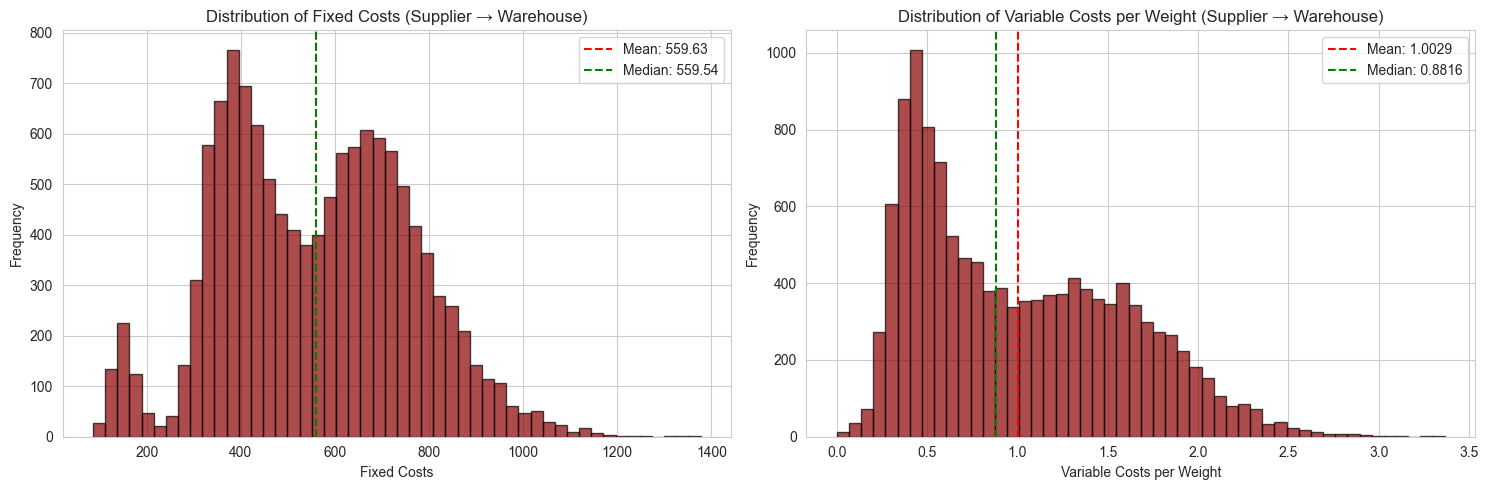

Supplier → Warehouse Cost Statistics:
Fixed Costs - Mean: 559.63, Std: 201.48
Fixed Costs - Min: 85.73, Max: 1377.20
Variable Costs - Mean: 1.0029, Std: 0.5785
Variable Costs - Min: 0.0000, Max: 3.3644


In [5]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Fixed costs distribution
axes[0].hist(supplier_to_warehouse_df['fixed_costs'], bins=50, edgecolor='black', alpha=0.7, color='darkred')
axes[0].set_xlabel('Fixed Costs')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fixed Costs (Supplier → Warehouse)')
axes[0].axvline(supplier_to_warehouse_df['fixed_costs'].mean(), color='r', linestyle='--', label=f'Mean: {supplier_to_warehouse_df["fixed_costs"].mean():.2f}')
axes[0].axvline(supplier_to_warehouse_df['fixed_costs'].median(), color='g', linestyle='--', label=f'Median: {supplier_to_warehouse_df["fixed_costs"].median():.2f}')
axes[0].legend()

# Variable costs distribution
axes[1].hist(supplier_to_warehouse_df['variable_costs_per_weight'], bins=50, edgecolor='black', alpha=0.7, color='darkred')
axes[1].set_xlabel('Variable Costs per Weight')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Variable Costs per Weight (Supplier → Warehouse)')
axes[1].axvline(supplier_to_warehouse_df['variable_costs_per_weight'].mean(), color='r', linestyle='--', label=f'Mean: {supplier_to_warehouse_df["variable_costs_per_weight"].mean():.4f}')
axes[1].axvline(supplier_to_warehouse_df['variable_costs_per_weight'].median(), color='g', linestyle='--', label=f'Median: {supplier_to_warehouse_df["variable_costs_per_weight"].median():.4f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print statistics
print("Supplier → Warehouse Cost Statistics:")
print(f"Fixed Costs - Mean: {supplier_to_warehouse_df['fixed_costs'].mean():.2f}, Std: {supplier_to_warehouse_df['fixed_costs'].std():.2f}")
print(f"Fixed Costs - Min: {supplier_to_warehouse_df['fixed_costs'].min():.2f}, Max: {supplier_to_warehouse_df['fixed_costs'].max():.2f}")
print(f"Variable Costs - Mean: {supplier_to_warehouse_df['variable_costs_per_weight'].mean():.4f}, Std: {supplier_to_warehouse_df['variable_costs_per_weight'].std():.4f}")
print(f"Variable Costs - Min: {supplier_to_warehouse_df['variable_costs_per_weight'].min():.4f}, Max: {supplier_to_warehouse_df['variable_costs_per_weight'].max():.4f}")


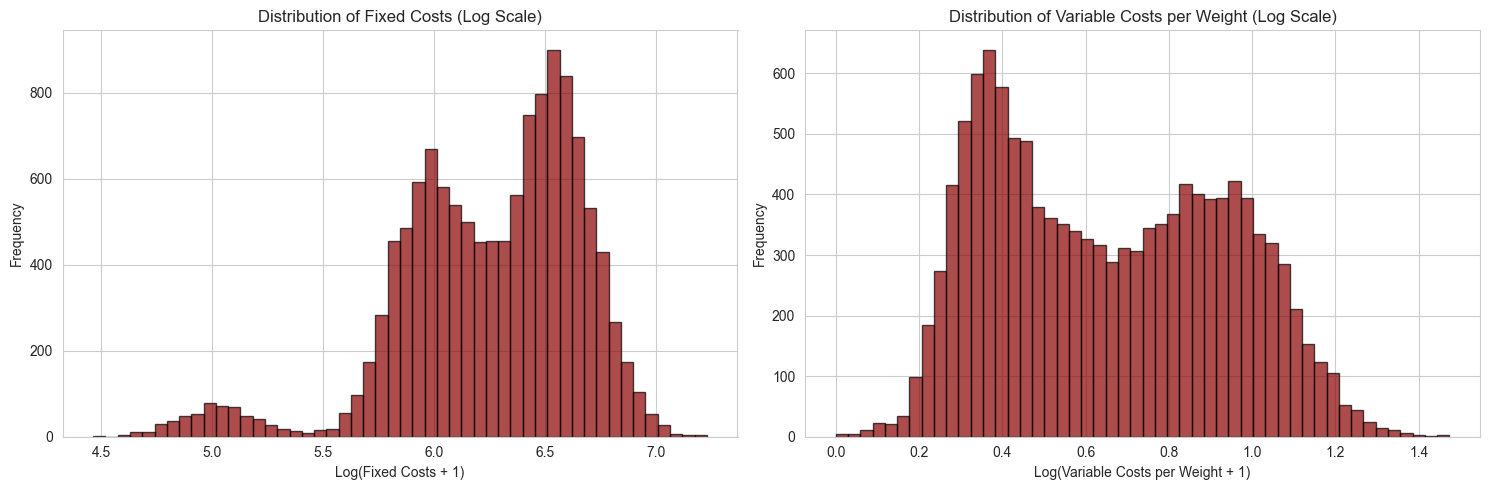

In [6]:
# Log scale for better visualization if needed
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(np.log1p(supplier_to_warehouse_df['fixed_costs']), bins=50, edgecolor='black', alpha=0.7, color='darkred')
axes[0].set_xlabel('Log(Fixed Costs + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Fixed Costs (Log Scale)')

axes[1].hist(np.log1p(supplier_to_warehouse_df['variable_costs_per_weight']), bins=50, edgecolor='black', alpha=0.7, color='darkred')
axes[1].set_xlabel('Log(Variable Costs per Weight + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Variable Costs per Weight (Log Scale)')

plt.tight_layout()
plt.show()

## 2. Distribution of SKU Weights and Unit Costs

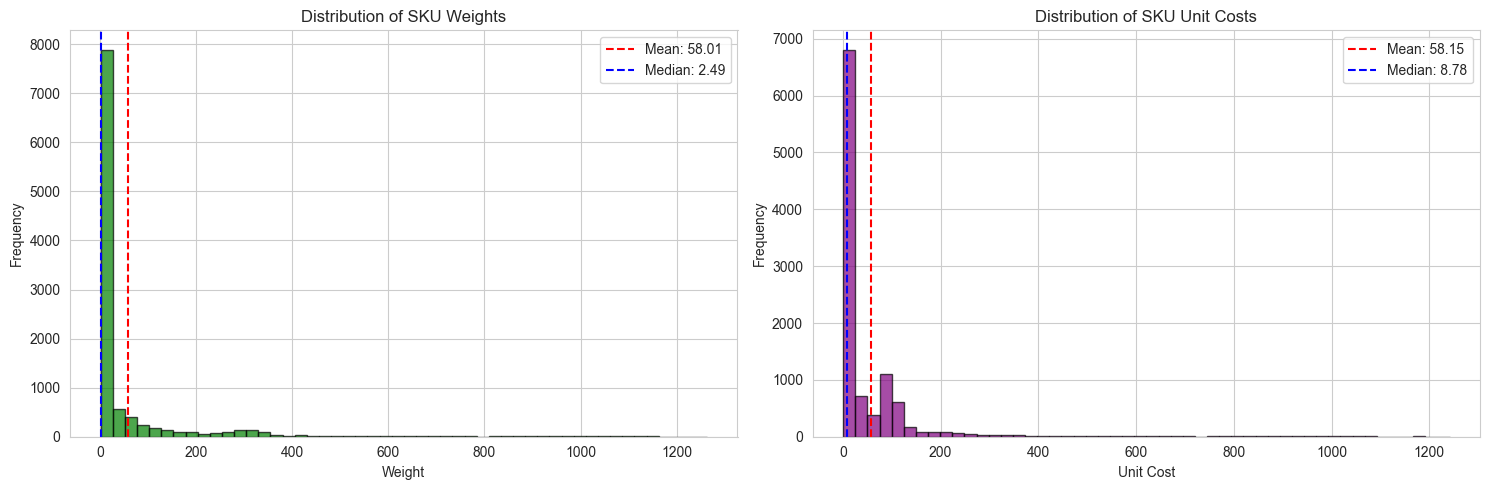

SKU Statistics:
Weight - Mean: 58.01, Std: 153.88
Weight - Min: 0.69, Max: 1263.75
Unit Cost - Mean: 58.15, Std: 137.29
Unit Cost - Min: 0.66, Max: 1241.57


In [7]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Weight distribution
axes[0].hist(skus_df['weight'], bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('Weight')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SKU Weights')
axes[0].axvline(skus_df['weight'].mean(), color='r', linestyle='--', label=f'Mean: {skus_df["weight"].mean():.2f}')
axes[0].axvline(skus_df['weight'].median(), color='b', linestyle='--', label=f'Median: {skus_df["weight"].median():.2f}')
axes[0].legend()

# Unit cost distribution
axes[1].hist(skus_df['unitcost'], bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1].set_xlabel('Unit Cost')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of SKU Unit Costs')
axes[1].axvline(skus_df['unitcost'].mean(), color='r', linestyle='--', label=f'Mean: {skus_df["unitcost"].mean():.2f}')
axes[1].axvline(skus_df['unitcost'].median(), color='b', linestyle='--', label=f'Median: {skus_df["unitcost"].median():.2f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print statistics
print("SKU Statistics:")
print(f"Weight - Mean: {skus_df['weight'].mean():.2f}, Std: {skus_df['weight'].std():.2f}")
print(f"Weight - Min: {skus_df['weight'].min():.2f}, Max: {skus_df['weight'].max():.2f}")
print(f"Unit Cost - Mean: {skus_df['unitcost'].mean():.2f}, Std: {skus_df['unitcost'].std():.2f}")
print(f"Unit Cost - Min: {skus_df['unitcost'].min():.2f}, Max: {skus_df['unitcost'].max():.2f}")


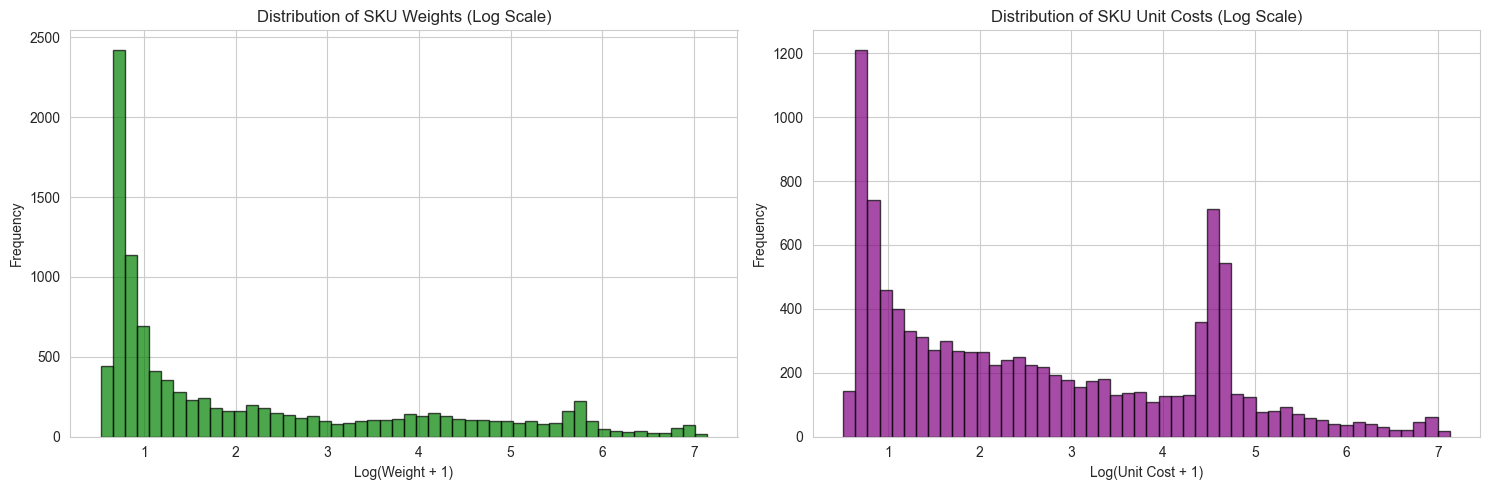

In [8]:
# Log scale for better visualization if needed
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].hist(np.log1p(skus_df['weight']), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0].set_xlabel('Log(Weight + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SKU Weights (Log Scale)')

axes[1].hist(np.log1p(skus_df['unitcost']), bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1].set_xlabel('Log(Unit Cost + 1)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of SKU Unit Costs (Log Scale)')

plt.tight_layout()
plt.show()


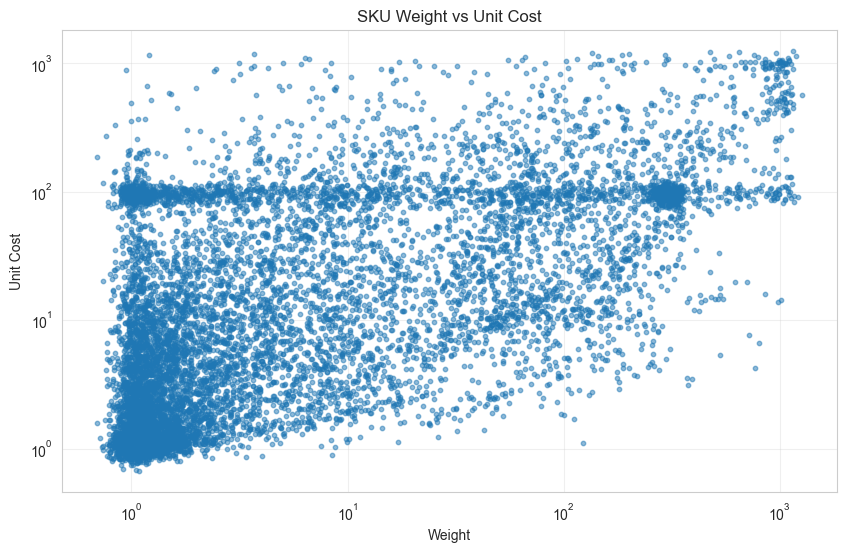

Correlation between Weight and Unit Cost: 0.5197


In [9]:
# Scatter plot: Weight vs Unit Cost
plt.figure(figsize=(10, 6))
plt.scatter(skus_df['weight'], skus_df['unitcost'], alpha=0.5, s=10)
plt.xlabel('Weight')
plt.ylabel('Unit Cost')
plt.title('SKU Weight vs Unit Cost')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, alpha=0.3)
plt.show()

# Correlation
correlation = skus_df['weight'].corr(skus_df['unitcost'])
print(f"Correlation between Weight and Unit Cost: {correlation:.4f}")


## 3. Distribution of SKUs per Supplier

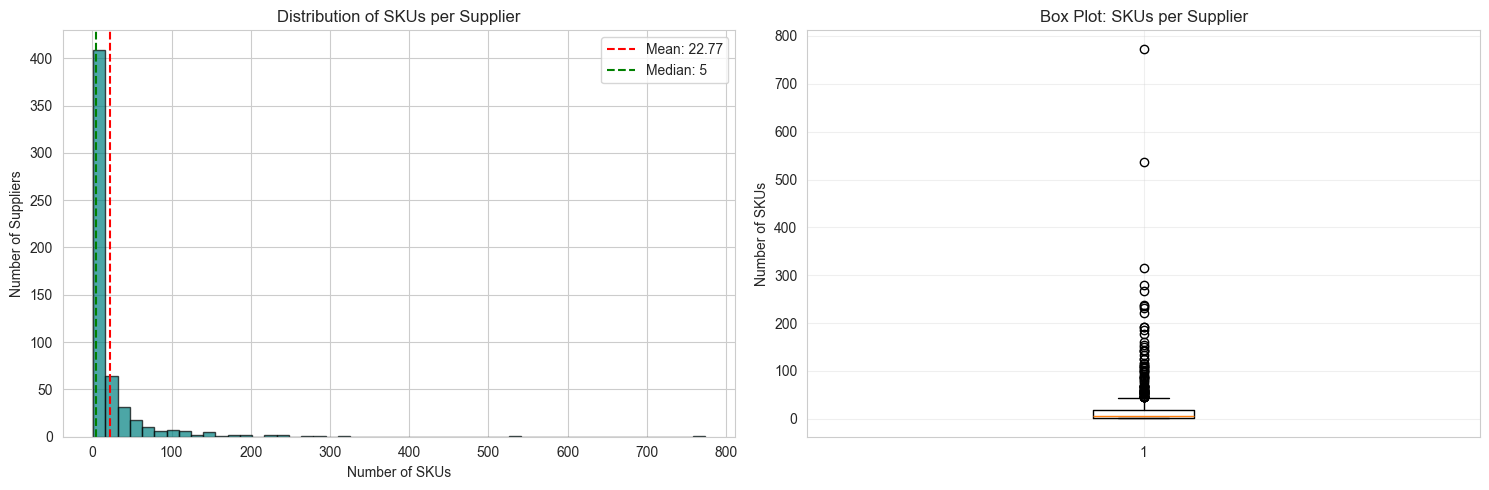

SKUs per Supplier Statistics:
Mean: 22.77
Median: 5
Std: 55.41
Min: 1
Max: 773
Total suppliers: 572
Suppliers with 1 SKU: 123
Suppliers with >10 SKUs: 209


In [10]:
# Count SKUs per supplier
skus_per_supplier = skus_per_supplier_df.groupby('supplierid').size().reset_index(name='n_skus')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(skus_per_supplier['n_skus'], bins=50, edgecolor='black', alpha=0.7, color='teal')
axes[0].set_xlabel('Number of SKUs')
axes[0].set_ylabel('Number of Suppliers')
#axes[0].set_yscale('log')
axes[0].set_title('Distribution of SKUs per Supplier')
axes[0].axvline(skus_per_supplier['n_skus'].mean(), color='r', linestyle='--', label=f'Mean: {skus_per_supplier["n_skus"].mean():.2f}')
axes[0].axvline(skus_per_supplier['n_skus'].median(), color='g', linestyle='--', label=f'Median: {skus_per_supplier["n_skus"].median():.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(skus_per_supplier['n_skus'], vert=True)
axes[1].set_ylabel('Number of SKUs')
axes[1].set_title('Box Plot: SKUs per Supplier')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("SKUs per Supplier Statistics:")
print(f"Mean: {skus_per_supplier['n_skus'].mean():.2f}")
print(f"Median: {skus_per_supplier['n_skus'].median():.0f}")
print(f"Std: {skus_per_supplier['n_skus'].std():.2f}")
print(f"Min: {skus_per_supplier['n_skus'].min()}")
print(f"Max: {skus_per_supplier['n_skus'].max()}")
print(f"Total suppliers: {len(skus_per_supplier)}")
print(f"Suppliers with 1 SKU: {(skus_per_supplier['n_skus'] == 1).sum()}")
print(f"Suppliers with >10 SKUs: {(skus_per_supplier['n_skus'] > 10).sum()}")


## 4. Amount of Orders per Day ID


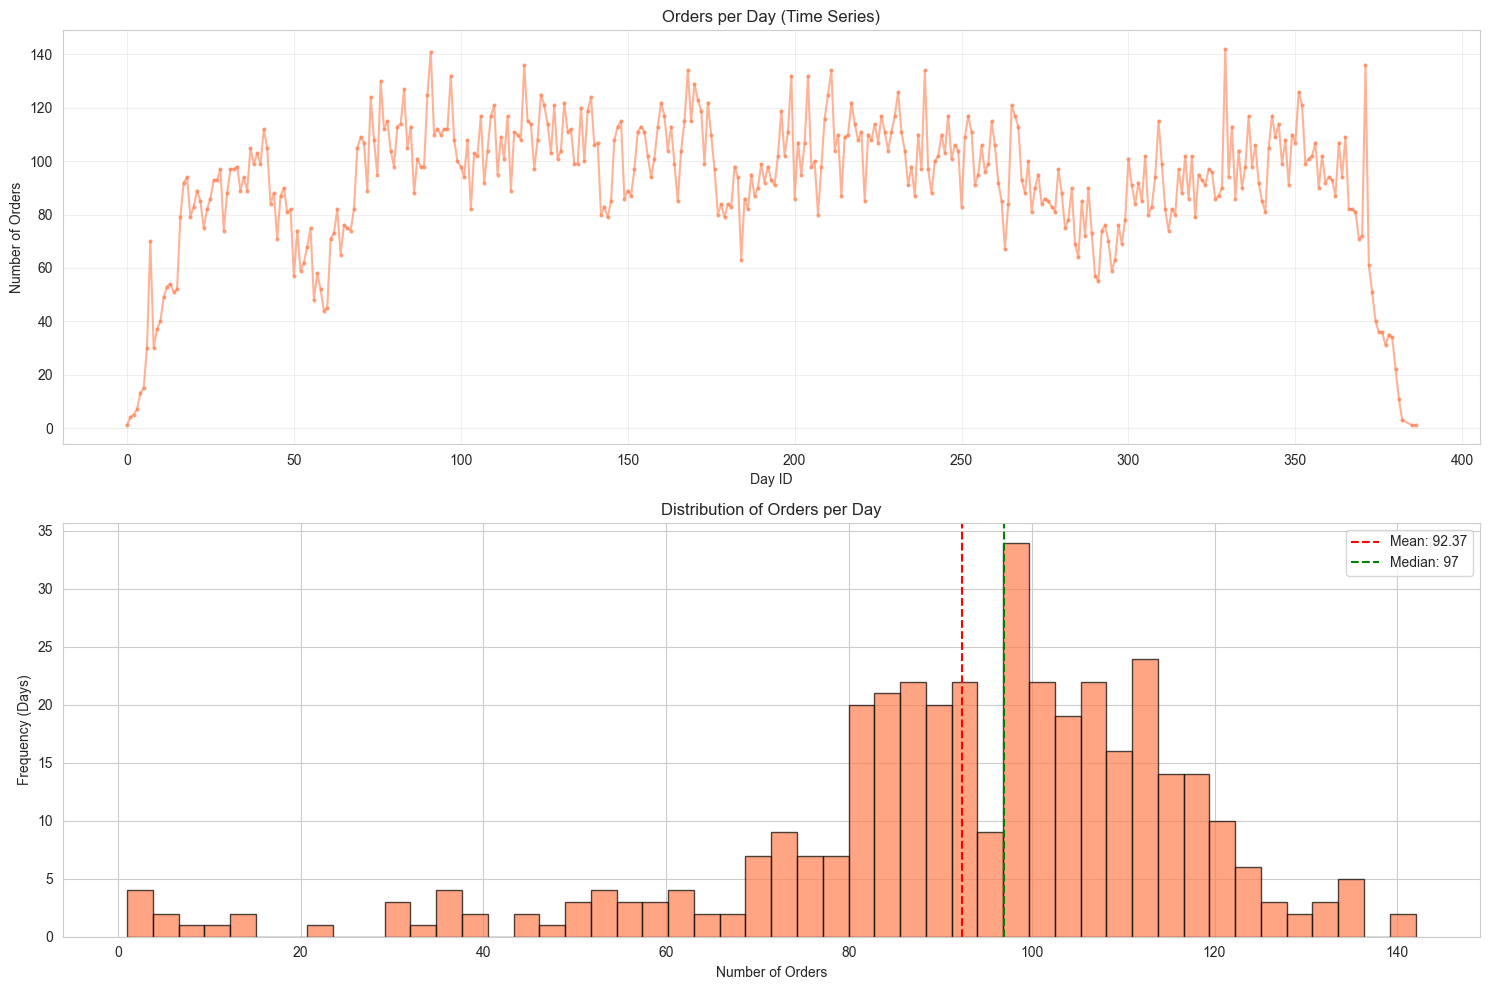

Orders per Day Statistics:
Total days: 385
Day range: 0 to 386
Mean orders per day: 92.37
Median orders per day: 97
Std: 24.94
Min: 1
Max: 142
Days with 0 orders: 0
Days with >100 orders: 157


In [11]:
# Count orders per day
orders_per_day = orders_df.groupby('day_id').size().reset_index(name='n_orders')

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Time series plot
axes[0].plot(orders_per_day['day_id'], orders_per_day['n_orders'], marker='o', markersize=2, alpha=0.6, color='coral')
axes[0].set_xlabel('Day ID')
axes[0].set_ylabel('Number of Orders')
axes[0].set_title('Orders per Day (Time Series)')
axes[0].grid(True, alpha=0.3)

# Histogram
axes[1].hist(orders_per_day['n_orders'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_xlabel('Number of Orders')
axes[1].set_ylabel('Frequency (Days)')
axes[1].set_title('Distribution of Orders per Day')
axes[1].axvline(orders_per_day['n_orders'].mean(), color='r', linestyle='--', label=f'Mean: {orders_per_day["n_orders"].mean():.2f}')
axes[1].axvline(orders_per_day['n_orders'].median(), color='g', linestyle='--', label=f'Median: {orders_per_day["n_orders"].median():.0f}')
axes[1].legend()

plt.tight_layout()
plt.show()

# Print statistics
print("Orders per Day Statistics:")
print(f"Total days: {len(orders_per_day)}")
print(f"Day range: {orders_per_day['day_id'].min()} to {orders_per_day['day_id'].max()}")
print(f"Mean orders per day: {orders_per_day['n_orders'].mean():.2f}")
print(f"Median orders per day: {orders_per_day['n_orders'].median():.0f}")
print(f"Std: {orders_per_day['n_orders'].std():.2f}")
print(f"Min: {orders_per_day['n_orders'].min()}")
print(f"Max: {orders_per_day['n_orders'].max()}")
print(f"Days with 0 orders: {(orders_per_day['n_orders'] == 0).sum()}")
print(f"Days with >100 orders: {(orders_per_day['n_orders'] > 100).sum()}")



## 5. Amount of SKUs per Order

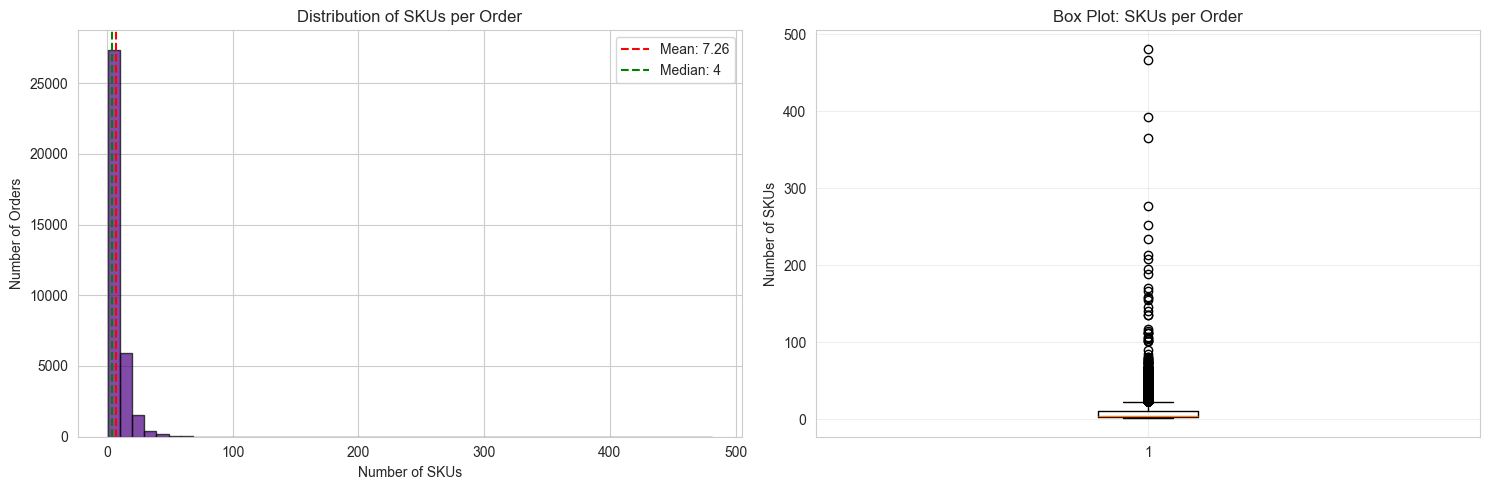

SKUs per Order Statistics:
Mean: 7.26
Median: 4
Std: 9.95
Min: 1
Max: 481
Orders with 1 SKU: 7735 (21.8%)
Orders with >10 SKUs: 8205 (23.1%)


In [12]:
# Count SKUs per order
skus_per_order = order_sku_demand_df.groupby('salesorderid').size().reset_index(name='n_skus')

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogram
axes[0].hist(skus_per_order['n_skus'], bins=50, edgecolor='black', alpha=0.7, color='indigo')
axes[0].set_xlabel('Number of SKUs')
axes[0].set_ylabel('Number of Orders')
axes[0].set_title('Distribution of SKUs per Order')
axes[0].axvline(skus_per_order['n_skus'].mean(), color='r', linestyle='--', label=f'Mean: {skus_per_order["n_skus"].mean():.2f}')
axes[0].axvline(skus_per_order['n_skus'].median(), color='g', linestyle='--', label=f'Median: {skus_per_order["n_skus"].median():.0f}')
axes[0].legend()

# Box plot
axes[1].boxplot(skus_per_order['n_skus'], vert=True)
axes[1].set_ylabel('Number of SKUs') 
axes[1].set_title('Box Plot: SKUs per Order')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print statistics
print("SKUs per Order Statistics:")
print(f"Mean: {skus_per_order['n_skus'].mean():.2f}")
print(f"Median: {skus_per_order['n_skus'].median():.0f}")
print(f"Std: {skus_per_order['n_skus'].std():.2f}")
print(f"Min: {skus_per_order['n_skus'].min()}")
print(f"Max: {skus_per_order['n_skus'].max()}")
print(f"Orders with 1 SKU: {(skus_per_order['n_skus'] == 1).sum()} ({(skus_per_order['n_skus'] == 1).sum() / len(skus_per_order) * 100:.1f}%)")
print(f"Orders with >10 SKUs: {(skus_per_order['n_skus'] > 10).sum()} ({(skus_per_order['n_skus'] > 10).sum() / len(skus_per_order) * 100:.1f}%)")


## 6. Relation between Available Timesteps and n_skus

In [13]:
# Import the preprocessor to simulate filtering
import sys
sys.path.append('../..')
from src.data.preprocessor import RawDataLoader, DataSelector, DataProcessor
import numpy as np

# Test different n_skus values
n_skus_values = [10, 25, 50, 100, 200, 500, 1000, 2000, 5000]
n_warehouses = 24  # All warehouses
n_regions = 57  # All regions

results = []

print("Analyzing timesteps for different n_skus values...")
print("This may take a while...")

for n_skus in n_skus_values:
    try:
        # Load data
        loader = RawDataLoader(str(RAW_DATA_PATH))
        loader.load_all()
        
        # Get available SKUs
        available_sku_ids = loader.order_sku_demand_df['itemid'].unique().tolist()
        
        if len(available_sku_ids) < n_skus:
            print(f"Skipping n_skus={n_skus}: only {len(available_sku_ids)} SKUs available")
            continue
        
        # Select subsets
        selector = DataSelector(n_skus, n_warehouses, n_regions, selection_seed=42)
        selector.select_skus(available_sku_ids)
        selector.select_warehouses(loader.warehouses_df['nodeid'].unique().tolist())
        selector.select_regions(loader.regions_df['regionid'].unique().tolist())
        selector.select_suppliers(selector.selected_sku_ids, loader.skus_per_supplier_df)
        
        # Process data
        processor = DataProcessor(
            selected_sku_ids=selector.selected_sku_ids,
            selected_warehouse_ids=selector.selected_warehouse_ids,
            selected_region_ids=selector.selected_region_ids,
            selected_supplier_ids=selector.selected_supplier_ids,
            warehouse_to_region_df=loader.warehouse_to_region_df,
            supplier_to_warehouse_df=loader.supplier_to_warehouse_df,
            orders_df=loader.orders_df,
            order_sku_demand_df=loader.order_sku_demand_df,
            skus_df=loader.skus_df,
            regions_df=loader.regions_df,
        )
        
        processed_data = processor.create_processed_demand_data()
        
        n_timesteps = processed_data['timestep'].nunique()
        n_orders = processed_data['order_id'].nunique()
        
        results.append({
            'n_skus': n_skus,
            'n_timesteps': n_timesteps,
            'n_orders': n_orders,
            'avg_orders_per_timestep': n_orders / n_timesteps if n_timesteps > 0 else 0
        })
        
        print(f"n_skus={n_skus}: {n_timesteps} timesteps, {n_orders} orders")
        
    except Exception as e:
        print(f"Error for n_skus={n_skus}: {e}")
        continue

results_df = pd.DataFrame(results)


Analyzing timesteps for different n_skus values...
This may take a while...
n_skus=10: 68 timesteps, 79 orders
n_skus=25: 107 timesteps, 122 orders
n_skus=50: 204 timesteps, 287 orders
n_skus=100: 284 timesteps, 545 orders
n_skus=200: 379 timesteps, 4692 orders
n_skus=500: 382 timesteps, 11278 orders
n_skus=1000: 382 timesteps, 16623 orders
n_skus=2000: 384 timesteps, 28311 orders
n_skus=5000: 384 timesteps, 34357 orders


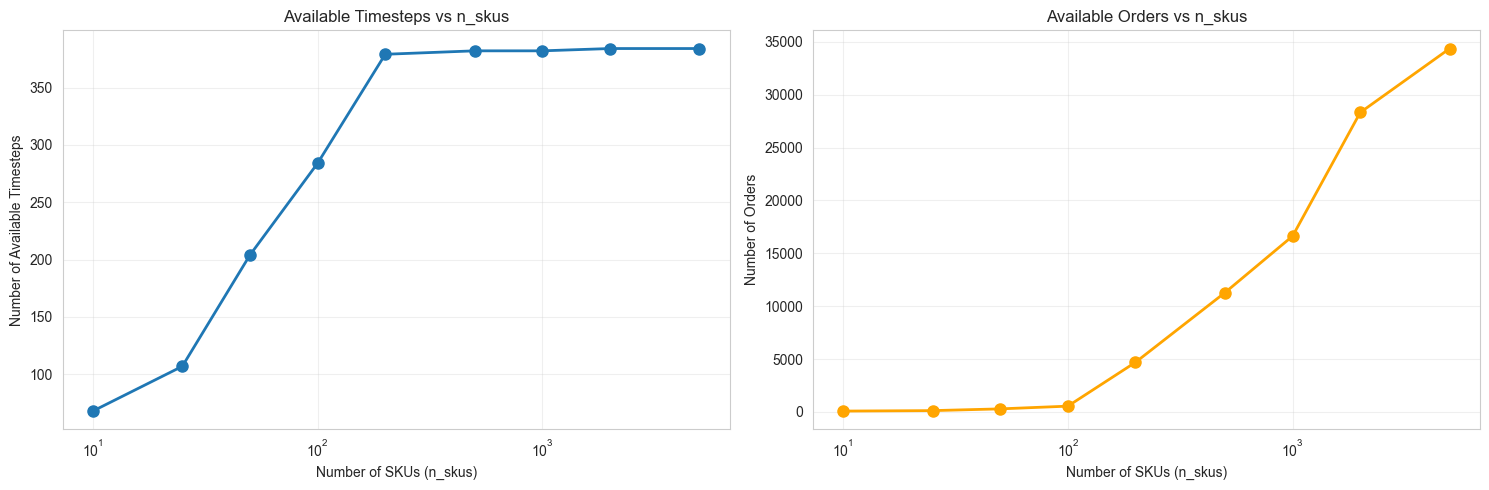


Results:
 n_skus  n_timesteps  n_orders  avg_orders_per_timestep
     10           68        79                 1.161765
     25          107       122                 1.140187
     50          204       287                 1.406863
    100          284       545                 1.919014
    200          379      4692                12.379947
    500          382     11278                29.523560
   1000          382     16623                43.515707
   2000          384     28311                73.726562
   5000          384     34357                89.471354


In [14]:
# Plot results
if len(results_df) > 0:
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Timesteps vs n_skus
    axes[0].plot(results_df['n_skus'], results_df['n_timesteps'], marker='o', linewidth=2, markersize=8)
    axes[0].set_xlabel('Number of SKUs (n_skus)')
    axes[0].set_ylabel('Number of Available Timesteps')
    axes[0].set_title('Available Timesteps vs n_skus')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xscale('log')
    
    # Orders vs n_skus
    axes[1].plot(results_df['n_skus'], results_df['n_orders'], marker='o', linewidth=2, markersize=8, color='orange')
    axes[1].set_xlabel('Number of SKUs (n_skus)')
    axes[1].set_ylabel('Number of Orders')
    axes[1].set_title('Available Orders vs n_skus')
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xscale('log')
    
    plt.tight_layout()
    plt.show()
    
    # Print table
    print("\nResults:")
    print(results_df.to_string(index=False))
else:
    print("No results to display")


## 7. Geographic Visualization


In [18]:
# Parameters to control visualization
n_skus = 100  # Set to None to show all suppliers, or an integer to filter suppliers by selected SKUs
n_warehouses = 10  # Set to None to show all, or an integer to show that many
n_regions = 10     # Set to None to show all, or an integer to show that many
n_suppliers_sample = 500  # Number of suppliers to sample (to avoid overcrowding, only used if n_skus is None)

try:
    import folium
    from folium import plugins
    from IPython.display import display, HTML
    
    # Filter suppliers based on n_skus if specified
    if n_skus is not None:
        # Get available SKUs from order data
        available_sku_ids = order_sku_demand_df['itemid'].unique().tolist()
        
        if len(available_sku_ids) < n_skus:
            print(f"Warning: Only {len(available_sku_ids)} SKUs available, but n_skus={n_skus}. Using all available SKUs.")
            selected_sku_ids = available_sku_ids
        else:
            # Select n_skus SKUs (same method as in section 6)
            import numpy as np
            rng = np.random.default_rng(42)
            selected_sku_ids = rng.choice(available_sku_ids, size=n_skus, replace=False).tolist()
        
        # Find suppliers that supply the selected SKUs
        suppliers_for_selected_skus = skus_per_supplier_df[
            skus_per_supplier_df['itemid'].isin(selected_sku_ids)
        ]['supplierid'].unique()
        
        # Filter suppliers dataframe to only include those suppliers
        suppliers_to_plot = suppliers_df[suppliers_df['supplierid'].isin(suppliers_for_selected_skus)]
        
        print(f"Selected {len(selected_sku_ids)} SKUs")
        print(f"Found {len(suppliers_to_plot)} suppliers that supply these SKUs (out of {len(suppliers_df)} total)")
    else:
        # If n_skus is None, sample suppliers randomly
        suppliers_to_plot = suppliers_df.sample(min(n_suppliers_sample, len(suppliers_df)), random_state=42)
        print(f"Sampling {len(suppliers_to_plot)} suppliers (n_skus=None)")
    
    # Select warehouses and regions based on parameters
    if n_warehouses is None:
        warehouses_to_plot = warehouses_df
    else:
        warehouses_to_plot = warehouses_df.sample(min(n_warehouses, len(warehouses_df)), random_state=42)
        print(f"Showing {len(warehouses_to_plot)} out of {len(warehouses_df)} warehouses")
    
    if n_regions is None:
        regions_to_plot = regions_df
    else:
        regions_to_plot = regions_df.sample(min(n_regions, len(regions_df)), random_state=42)
        print(f"Showing {len(regions_to_plot)} out of {len(regions_df)} regions")
    
    # Create base map centered on selected coordinates
    avg_lat = (warehouses_to_plot['latitude'].mean() + regions_to_plot['latitude'].mean() + suppliers_to_plot['latitude'].mean()) / 3
    avg_lon = (warehouses_to_plot['longitude'].mean() + regions_to_plot['longitude'].mean() + suppliers_to_plot['longitude'].mean()) / 3
    
    m = folium.Map(location=[avg_lat, avg_lon], zoom_start=3)
    
    # Add warehouses
    for idx, row in warehouses_to_plot.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=5,
            popup=f"Warehouse: {row['nodeid']}",
            color='blue',
            fill=True,
            fillColor='blue',
            fillOpacity=0.6
        ).add_to(m)
    
    # Add regions
    for idx, row in regions_to_plot.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=3,
            popup=f"Region: {row['code']} ({row['city']})",
            color='green',
            fill=True,
            fillColor='green',
            fillOpacity=0.4
        ).add_to(m)
    
    # Add suppliers (filtered by n_skus if specified)
    for idx, row in suppliers_to_plot.iterrows():
        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=2,
            popup=f"Supplier: {row['supplierid']}",
            color='red',
            fill=True,
            fillColor='red',
            fillOpacity=0.3
        ).add_to(m)
    
    # Add legend
    sku_info = f" (for {n_skus} SKUs)" if n_skus is not None else ""
    legend_html = f'''
    <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 220px; height: 160px; 
                 background-color: white; z-index:9999; font-size:14px;
                 border:2px solid grey; border-radius: 5px; padding: 10px">
    <p><b>Legend</b></p>
    <p><span style="color:blue;">●</span> Warehouses ({len(warehouses_to_plot)})</p>
    <p><span style="color:green;">●</span> Regions ({len(regions_to_plot)})</p>
    <p><span style="color:red;">●</span> Suppliers ({len(suppliers_to_plot)}){sku_info}</p>
    </div>
    '''
    m.get_root().html.add_child(folium.Element(legend_html))
    
    # Save map
    m.save('geographic_map.html')
    print(f"Map saved as 'geographic_map.html'")
    print(f"Total locations: {len(warehouses_to_plot)} warehouses, {len(regions_to_plot)} regions, {len(suppliers_to_plot)} suppliers")
    
    # Display in notebook - using explicit display import
    display(HTML(m._repr_html_()))
    
except ImportError:
    print("folium not installed. Creating static plot instead...")
    
    # Filter suppliers based on n_skus if specified (same logic as above)
    if n_skus is not None:
        # Get available SKUs from order data
        available_sku_ids = order_sku_demand_df['itemid'].unique().tolist()
        
        if len(available_sku_ids) < n_skus:
            print(f"Warning: Only {len(available_sku_ids)} SKUs available, but n_skus={n_skus}. Using all available SKUs.")
            selected_sku_ids = available_sku_ids
        else:
            # Select n_skus SKUs (same method as in section 6)
            import numpy as np
            rng = np.random.default_rng(42)
            selected_sku_ids = rng.choice(available_sku_ids, size=n_skus, replace=False).tolist()
        
        # Find suppliers that supply the selected SKUs
        suppliers_for_selected_skus = skus_per_supplier_df[
            skus_per_supplier_df['itemid'].isin(selected_sku_ids)
        ]['supplierid'].unique()
        
        # Filter suppliers dataframe to only include those suppliers
        suppliers_to_plot = suppliers_df[suppliers_df['supplierid'].isin(suppliers_for_selected_skus)]
        
        print(f"Selected {len(selected_sku_ids)} SKUs")
        print(f"Found {len(suppliers_to_plot)} suppliers that supply these SKUs (out of {len(suppliers_df)} total)")
    else:
        # If n_skus is None, sample suppliers randomly
        suppliers_to_plot = suppliers_df.sample(min(n_suppliers_sample, len(suppliers_df)), random_state=42)
        print(f"Sampling {len(suppliers_to_plot)} suppliers (n_skus=None)")
    
    # Select warehouses and regions based on parameters (same logic as above)
    if n_warehouses is None:
        warehouses_to_plot = warehouses_df
    else:
        warehouses_to_plot = warehouses_df.sample(min(n_warehouses, len(warehouses_df)), random_state=42)
        print(f"Showing {len(warehouses_to_plot)} out of {len(warehouses_df)} warehouses")
    
    if n_regions is None:
        regions_to_plot = regions_df
    else:
        regions_to_plot = regions_df.sample(min(n_regions, len(regions_df)), random_state=42)
        print(f"Showing {len(regions_to_plot)} out of {len(regions_df)} regions")
    
    # Static plot using matplotlib
    fig, ax = plt.subplots(figsize=(15, 10))
    
    # Plot suppliers (filtered by n_skus if specified)
    sku_label = f" (for {n_skus} SKUs)" if n_skus is not None else ""
    ax.scatter(suppliers_to_plot['longitude'], suppliers_to_plot['latitude'], 
               c='red', s=5, alpha=0.3, label=f'Suppliers ({len(suppliers_to_plot)}){sku_label}')
    
    # Plot warehouses
    ax.scatter(warehouses_to_plot['longitude'], warehouses_to_plot['latitude'], 
               c='blue', s=100, marker='s', label=f'Warehouses ({len(warehouses_to_plot)})', edgecolors='black', linewidths=1)
    
    # Plot regions
    ax.scatter(regions_to_plot['longitude'], regions_to_plot['latitude'], 
               c='green', s=50, marker='^', label=f'Regions ({len(regions_to_plot)})', edgecolors='black', linewidths=1)
    
    title_suffix = f" (Suppliers filtered by {n_skus} SKUs)" if n_skus is not None else ""
    ax.set_xlabel('Longitude')
    ax.set_ylabel('Latitude')
    ax.set_title(f'Geographic Distribution of Warehouses, Regions, and Suppliers{title_suffix}')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"Total locations: {len(warehouses_to_plot)} warehouses, {len(regions_to_plot)} regions, {len(suppliers_to_plot)} suppliers")


Selected 100 SKUs
Found 71 suppliers that supply these SKUs (out of 572 total)
Showing 10 out of 24 warehouses
Showing 10 out of 57 regions
Map saved as 'geographic_map.html'
Total locations: 10 warehouses, 10 regions, 71 suppliers


## 8. Additional Insights

### 8.1 Distribution of SKU Quantities per Order


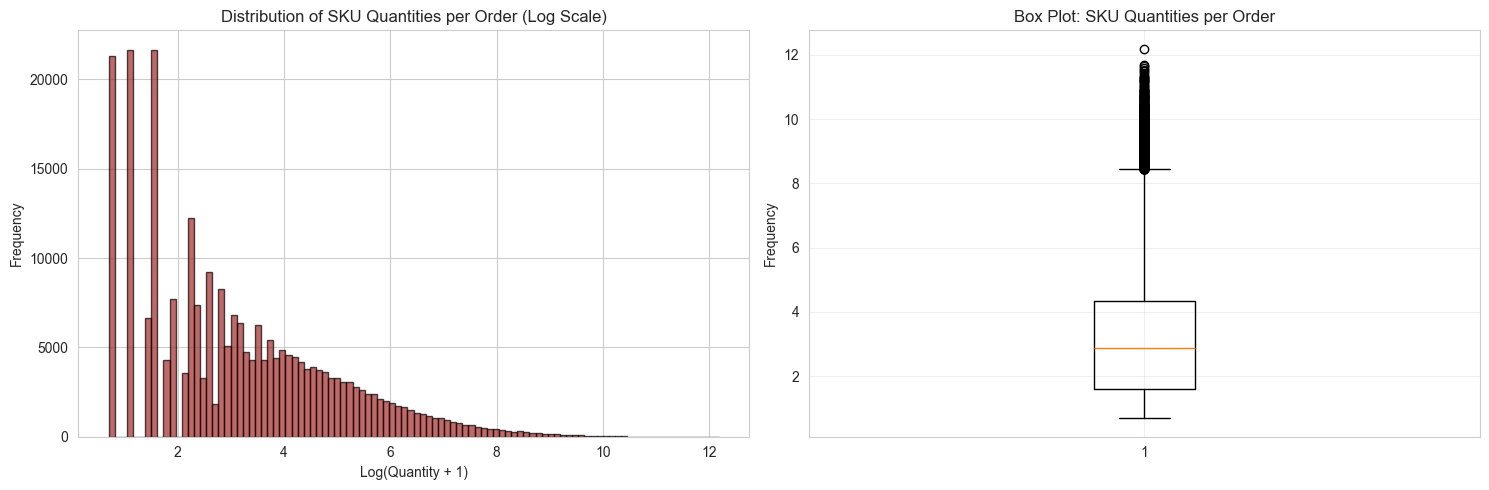

Order Quantity Statistics:
Mean: 215.36
Median: 17
Std: 1450.56
Min: 1
Max: 195392

Quantiles:
25th percentile (Q1): 4.00
50th percentile (Median): 17.00
75th percentile (Q3): 76.00
90th percentile: 309.00
95th percentile: 727.00
99th percentile: 3641.00


In [25]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Quantity distribution
#axes[0].hist(order_sku_demand_df['quantity'], bins=100, edgecolor='black', alpha=0.7, color='brown')
#axes[0].set_xlabel('Quantity')
#axes[0].set_ylabel('Frequency')
#axes[0].set_title('Distribution of SKU Quantities per Order')
#axes[0].axvline(order_sku_demand_df['quantity'].mean(), color='r', linestyle='--', label=f'Mean: {order_sku_demand_df["quantity"].mean():.2f}')
#axes[0].axvline(order_sku_demand_df['quantity'].median(), color='g', linestyle='--', label=f'Median: {order_sku_demand_df["quantity"].median():.0f}')
#axes[0].legend()

# Log scale
axes[0].hist(np.log1p(order_sku_demand_df['quantity']), bins=100, edgecolor='black', alpha=0.7, color='brown')
axes[0].set_xlabel('Log(Quantity + 1)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of SKU Quantities per Order (Log Scale)')

# Box Plot
axes[1].boxplot(np.log1p(order_sku_demand_df['quantity']), vert=True)
axes[1].set_ylabel('Frequency') 
axes[1].set_title('Box Plot: SKU Quantities per Order')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Order Quantity Statistics:")
print(f"Mean: {order_sku_demand_df['quantity'].mean():.2f}")
print(f"Median: {order_sku_demand_df['quantity'].median():.0f}")
print(f"Std: {order_sku_demand_df['quantity'].std():.2f}")
print(f"Min: {order_sku_demand_df['quantity'].min()}")
print(f"Max: {order_sku_demand_df['quantity'].max()}")

# Add quantiles
quantiles = order_sku_demand_df['quantity'].quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99])
print(f"\nQuantiles:")
print(f"25th percentile (Q1): {quantiles[0.25]:.2f}")
print(f"50th percentile (Median): {quantiles[0.5]:.2f}")
print(f"75th percentile (Q3): {quantiles[0.75]:.2f}")
print(f"90th percentile: {quantiles[0.9]:.2f}")
print(f"95th percentile: {quantiles[0.95]:.2f}")
print(f"99th percentile: {quantiles[0.99]:.2f}")


### 8.2 Most Popular SKUs


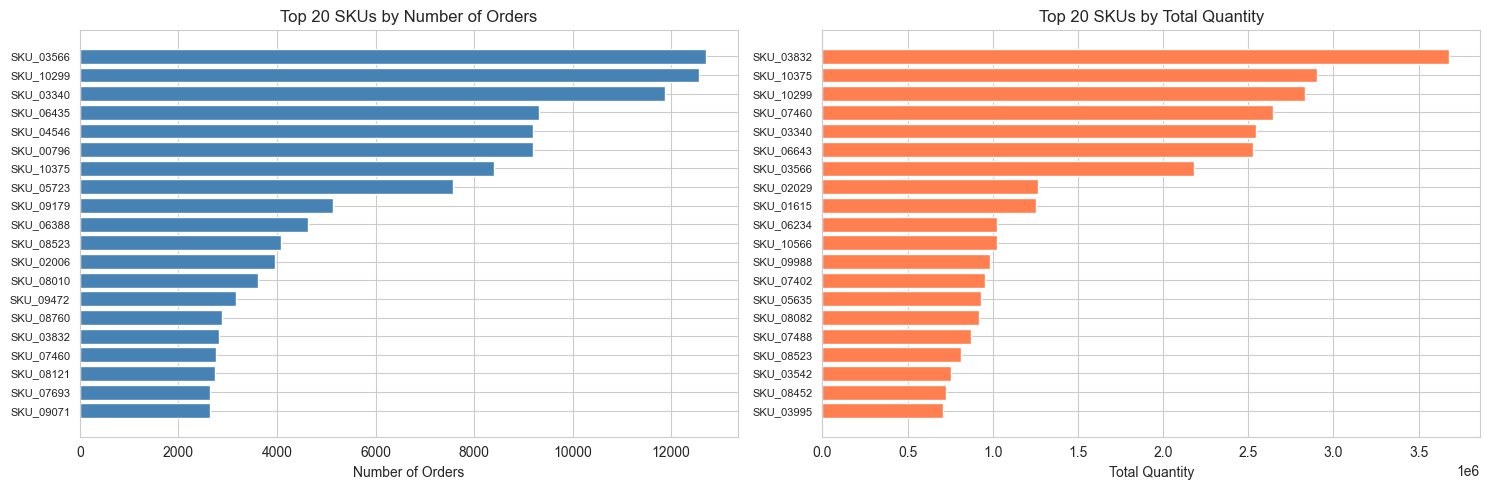


Top 10 SKUs by number of orders:
   itemid  n_orders  total_quantity
SKU_03566     12713         2182030
SKU_10299     12566         2834823
SKU_03340     11869         2545246
SKU_06435      9321           53605
SKU_04546      9191           50984
SKU_00796      9189           51230
SKU_10375      8414         2900286
SKU_05723      7567           45565
SKU_09179      5127           25929
SKU_06388      4635          157225


In [19]:
# Count orders per SKU
orders_per_sku = order_sku_demand_df.groupby('itemid').agg({
    'salesorderid': 'nunique',
    'quantity': 'sum'
}).reset_index()
orders_per_sku.columns = ['itemid', 'n_orders', 'total_quantity']
orders_per_sku = orders_per_sku.sort_values('n_orders', ascending=False)

# Top 20 SKUs by order count
top_20 = orders_per_sku.head(20)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].barh(range(len(top_20)), top_20['n_orders'], color='steelblue')
axes[0].set_yticks(range(len(top_20)))
axes[0].set_yticklabels(top_20['itemid'], fontsize=8)
axes[0].set_xlabel('Number of Orders')
axes[0].set_title('Top 20 SKUs by Number of Orders')
axes[0].invert_yaxis()

# Top 20 SKUs by total quantity
top_20_qty = orders_per_sku.sort_values('total_quantity', ascending=False).head(20)
axes[1].barh(range(len(top_20_qty)), top_20_qty['total_quantity'], color='coral')
axes[1].set_yticks(range(len(top_20_qty)))
axes[1].set_yticklabels(top_20_qty['itemid'], fontsize=8)
axes[1].set_xlabel('Total Quantity')
axes[1].set_title('Top 20 SKUs by Total Quantity')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

print("\nTop 10 SKUs by number of orders:")
print(top_20.head(10).to_string(index=False))


### 8.3 Distance Analysis


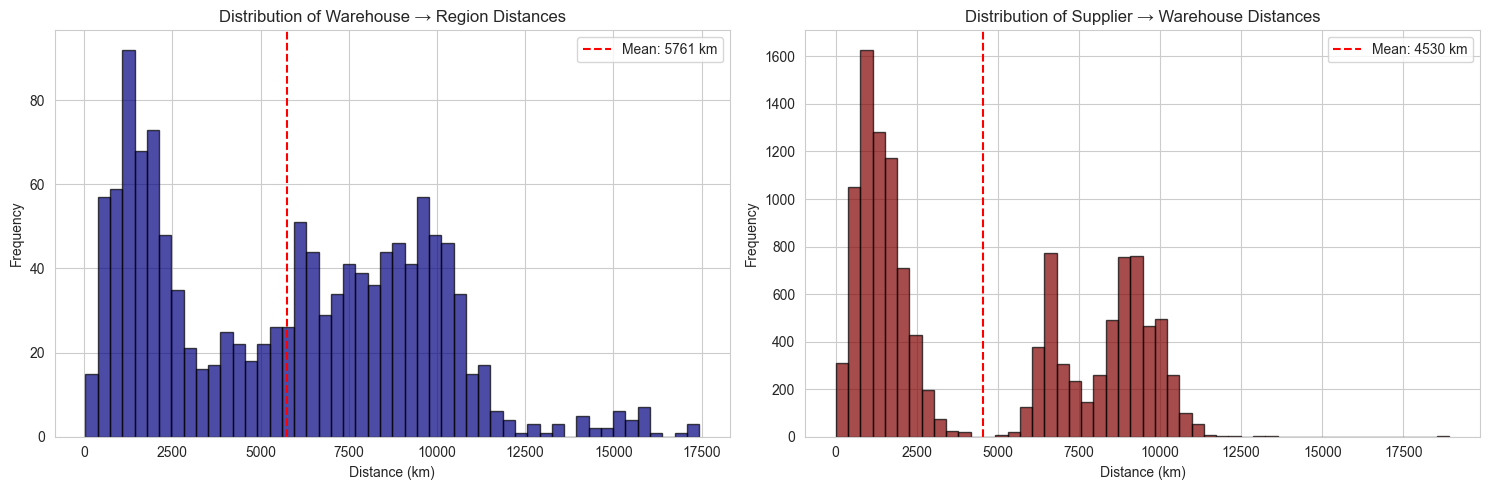

Distance Statistics:
Warehouse → Region - Mean: 5761 km, Max: 17426 km
Supplier → Warehouse - Mean: 4530 km, Max: 18916 km


In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Warehouse to region distances
axes[0].hist(warehouse_to_region_df['distance_km'], bins=50, edgecolor='black', alpha=0.7, color='navy')
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Warehouse → Region Distances')
axes[0].axvline(warehouse_to_region_df['distance_km'].mean(), color='r', linestyle='--', label=f'Mean: {warehouse_to_region_df["distance_km"].mean():.0f} km')
axes[0].legend()

# Supplier to warehouse distances
axes[1].hist(supplier_to_warehouse_df['distance_km'], bins=50, edgecolor='black', alpha=0.7, color='maroon')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Distribution of Supplier → Warehouse Distances')
axes[1].axvline(supplier_to_warehouse_df['distance_km'].mean(), color='r', linestyle='--', label=f'Mean: {supplier_to_warehouse_df["distance_km"].mean():.0f} km')
axes[1].legend()

plt.tight_layout()
plt.show()

print("Distance Statistics:")
print(f"Warehouse → Region - Mean: {warehouse_to_region_df['distance_km'].mean():.0f} km, Max: {warehouse_to_region_df['distance_km'].max():.0f} km")
print(f"Supplier → Warehouse - Mean: {supplier_to_warehouse_df['distance_km'].mean():.0f} km, Max: {supplier_to_warehouse_df['distance_km'].max():.0f} km")


### 8.4 Correlation: Distance vs Costs


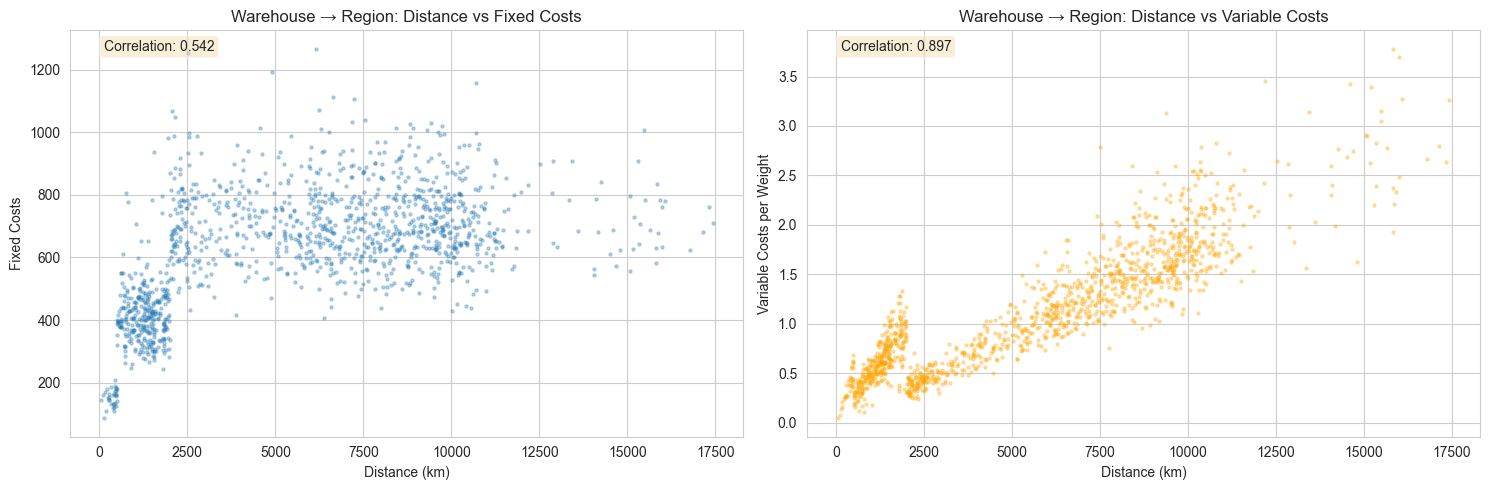

Correlation between distance and fixed costs: 0.542
Correlation between distance and variable costs: 0.897


In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Warehouse to region: distance vs fixed costs
axes[0].scatter(warehouse_to_region_df['distance_km'], warehouse_to_region_df['fixed_costs'], 
                alpha=0.3, s=5)
axes[0].set_xlabel('Distance (km)')
axes[0].set_ylabel('Fixed Costs')
axes[0].set_title('Warehouse → Region: Distance vs Fixed Costs')
corr_fixed = warehouse_to_region_df['distance_km'].corr(warehouse_to_region_df['fixed_costs'])
axes[0].text(0.05, 0.95, f'Correlation: {corr_fixed:.3f}', transform=axes[0].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Warehouse to region: distance vs variable costs
axes[1].scatter(warehouse_to_region_df['distance_km'], warehouse_to_region_df['variable_costs_per_weight'], 
                alpha=0.3, s=5, color='orange')
axes[1].set_xlabel('Distance (km)')
axes[1].set_ylabel('Variable Costs per Weight')
axes[1].set_title('Warehouse → Region: Distance vs Variable Costs')
corr_var = warehouse_to_region_df['distance_km'].corr(warehouse_to_region_df['variable_costs_per_weight'])
axes[1].text(0.05, 0.95, f'Correlation: {corr_var:.3f}', transform=axes[1].transAxes, 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

print(f"Correlation between distance and fixed costs: {corr_fixed:.3f}")
print(f"Correlation between distance and variable costs: {corr_var:.3f}")


### 8.5 Summary Statistics Table


In [21]:
# Create summary statistics
summary_data = {
    'Metric': [
        'Total Warehouses',
        'Total Regions',
        'Total Suppliers',
        'Total SKUs',
        'Total Orders',
        'Total Order-SKU Pairs',
        'Unique Days',
        'Day Range',
        'Avg Orders per Day',
        'Avg SKUs per Order',
        'Avg SKUs per Supplier',
        'Avg Warehouse-Region Distance (km)',
        'Avg Supplier-Warehouse Distance (km)',
    ],
    'Value': [
        len(warehouses_df),
        len(regions_df),
        len(suppliers_df),
        len(skus_df),
        len(orders_df),
        len(order_sku_demand_df),
        orders_df['day_id'].nunique(),
        f"{orders_df['day_id'].min()} - {orders_df['day_id'].max()}",
        f"{orders_df.groupby('day_id').size().mean():.2f}",
        f"{order_sku_demand_df.groupby('salesorderid').size().mean():.2f}",
        f"{skus_per_supplier_df.groupby('supplierid').size().mean():.2f}",
        f"{warehouse_to_region_df['distance_km'].mean():.0f}",
        f"{supplier_to_warehouse_df['distance_km'].mean():.0f}",
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(summary_df.to_string(index=False))



SUMMARY STATISTICS
                              Metric   Value
                    Total Warehouses      24
                       Total Regions      57
                     Total Suppliers     572
                          Total SKUs   10578
                        Total Orders   35562
               Total Order-SKU Pairs  258212
                         Unique Days     385
                           Day Range 0 - 386
                  Avg Orders per Day   92.37
                  Avg SKUs per Order    7.26
               Avg SKUs per Supplier   22.77
  Avg Warehouse-Region Distance (km)    5761
Avg Supplier-Warehouse Distance (km)    4530
